In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
food_consumption = pd.read_csv('food_consumption.csv')

## Measures of center

In [2]:
food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.

In [3]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == "Belgium"]

# Filter for USA
usa_consumption = food_consumption[food_consumption["country"] == "USA"]

Calculate the mean and median of kilograms of food consumed per person per year for both countries.

In [4]:
# Calculate mean and median consumption in Belgium
print(be_consumption['consumption'].mean())
print(be_consumption['consumption'].median())

42.132727272727266
12.59


In [5]:
# Calculate mean and median consumption in USA
print(usa_consumption['consumption'].mean())
print(usa_consumption['consumption'].median())

44.650000000000006
14.58


In [6]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == "USA")]

In [7]:
# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby("country")["consumption"].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


In [8]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == "rice"]

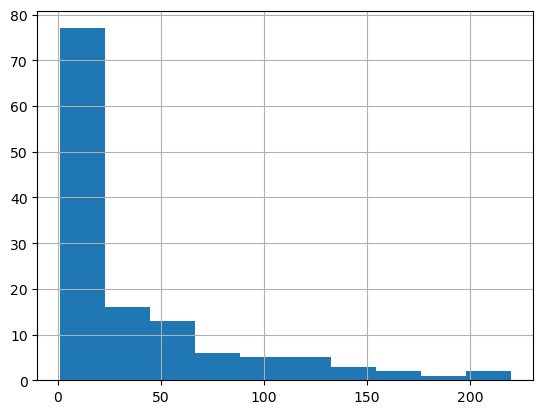

In [9]:
# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

You can observe that this graph is right skewed

In [10]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption["co2_emission"].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


## Quartiles, quantiles, and quintiles

In [11]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [12]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption["co2_emission"], [0,0.2,0.4,0.6,0.8,1.0]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [13]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption["co2_emission"],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


## Variance and Standard Deviation

In [15]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


In [16]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

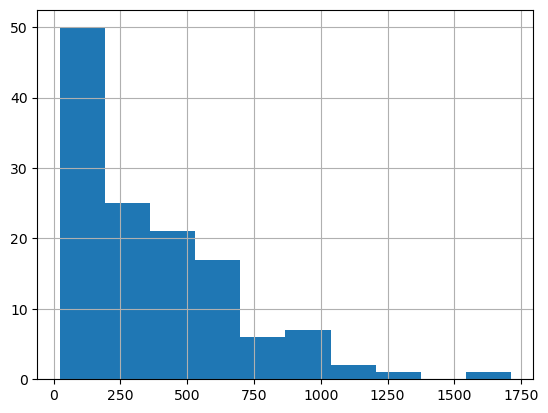

In [17]:
# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

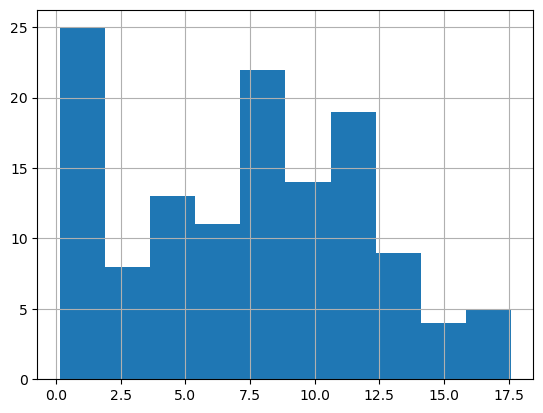

In [18]:
# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

## FInding outliers using IQR         

In [19]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby("country")["co2_emission"].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [20]:
# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [21]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [22]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
